<a href="https://colab.research.google.com/github/shrutisingh004/Deep-Learning/blob/main/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [ ]:
X = (X - X.min()) / (X.max() - X.min())
X = np.where(X > 0.5, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.08, n_iter=50, random_state=42)

In [ ]:
logistic = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial")

In [ ]:
rbm_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])
rbm_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.08, n_components=100, n_iter=50,
                              random_state=42)),
                ('logistic',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [ ]:
accuracy = rbm_classifier.score(X_test, y_test)
print(f"Classification accuracy: {accuracy:.4f}")

Classification accuracy: 0.9444


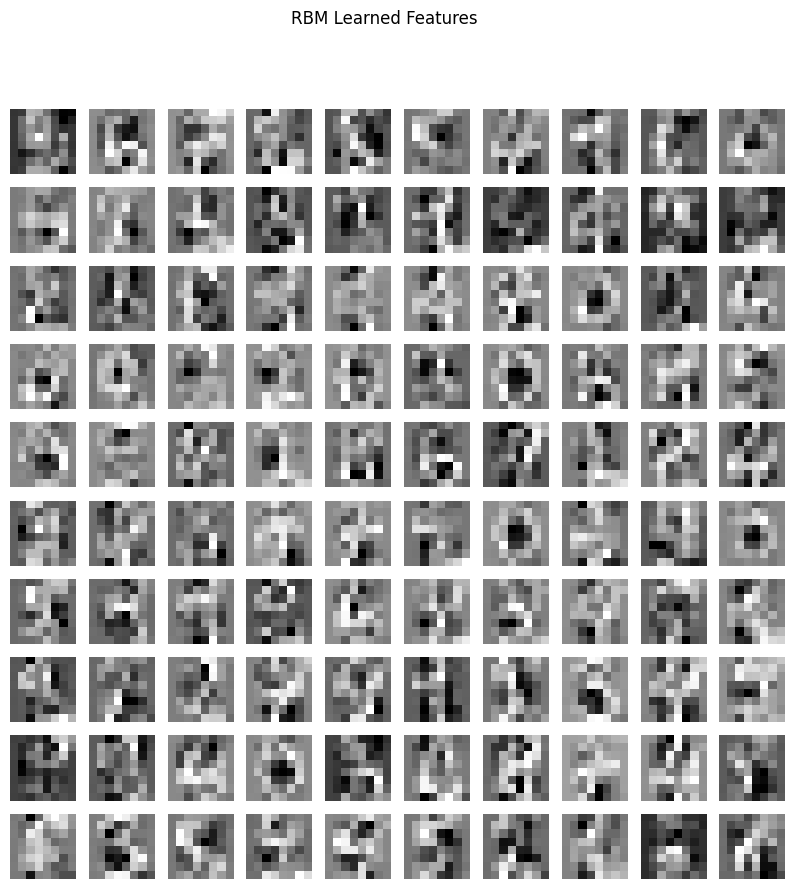

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(rbm.components_[i].reshape((8, 8)), cmap="gray")
    ax.axis("off")
plt.suptitle("RBM Learned Features")
plt.show()